# Feature Influence Analysis for 'idv' Column

This notebook demonstrates how to analyze which parameters most influence the `idv` column in your tabular data, and how to train a model for prediction. Follow the step-by-step code and visualizations below.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, and scikit-learn modules required for data analysis, visualization, and modeling.

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


## 2. Load and Explore the Data
Load the tabular data from the WITH NOD_IDS file using pandas. Display the first few rows, check for missing values, and summarize the data.

In [4]:
# Load the data
file_path = 'Etestdata_IDV_SPR_MCC_no_ids.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT,TTA+CGT_1.1G_NML2_SL+CAP2+4[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+COV_0.5G_NML2_SL+CAP2+5[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_NLVT_D2X1S_SL+IDX_4PT+115[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_PLVT_D2X1S_SL+IDX_4PT+38[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_60PP+IDX_4PT+92[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_SL+IDX_4PT+120[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_60PP+IDX_4PT+15[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_SL+IDX_4PT+43[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.2D/0.65G_NLVT_D2X1S_60PP+ID_4PT+215[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,...,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_60PP+BSEARCH_4PT+2[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_SL+BSEARCH_4PT+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_60PP+VTGMX_UTP+22[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_SL+VTGMX_UTP+27[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_60PP+VTGMX_UTP+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_SL+VTGMX_UTP+12[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_60PP+BSEARCHX_UTP+44[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_SL+BSEARCHX_UTP+54[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_60PP+BSEARCHX_UTP+14[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_SL+BSEARCHX_UTP+24[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL
0,14622.08,84.5,73.0,68.0,67.0,77.5,68.0,75.0,70.0,74.0,...,194.0,155.5,272.0,252.5,250.5,241.0,166.0,154.0,153.0,154.0
1,15202.52,85.5,80.0,68.0,68.0,71.5,70.5,70.5,67.0,72.0,...,192.0,161.0,266.0,250.5,243.0,238.5,159.0,158.0,155.5,146.0
2,15399.37,89.0,73.0,68.0,67.0,71.5,67.0,74.0,67.5,71.0,...,195.0,151.5,269.5,251.5,249.5,238.0,162.5,164.0,149.0,143.0
3,15470.03,84.0,76.0,68.5,70.0,77.0,68.0,74.0,70.5,74.0,...,192.5,161.0,268.0,262.0,250.0,246.5,161.5,155.0,154.0,141.5
4,15347.89,92.0,74.0,72.0,70.0,74.0,70.0,81.0,76.5,75.0,...,192.0,160.0,265.5,249.0,246.5,244.0,159.0,158.5,149.0,144.0


In [5]:
# Check for missing values and summarize the data
print('Missing values per column:')
print(df.isnull().sum())

df.describe()

Missing values per column:
IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT                                                    0
TTA+CGT_1.1G_NML2_SL+CAP2+4[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL                                0
TTA+COV_0.5G_NML2_SL+CAP2+5[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL                                0
TTA+ID4_0.05D/0.65G_NLVT_D2X1S_SL+IDX_4PT+115[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL        0
TTA+ID4_0.05D/0.65G_PLVT_D2X1S_SL+IDX_4PT+38[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL         0
                                                                                                    ..
TTA+VTGM4_0.05D_PLVT_D2X1S_SL+VTGMX_UTP+12[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL           0
TTA+VTGM4_0.65D_NLVT_D2X1S_60PP+BSEARCHX_UTP+44[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL    0
TTA+VTGM4_0.65D_NLVT_D2X1S_SL+BSEARCHX_UTP+54[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL        0
TTA+VTGM4_0.65D_PLVT_D2X1S_60PP+BSEARCHX_UTP+1

,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT,TTA+CGT_1.1G_NML2_SL+CAP2+4[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+COV_0.5G_NML2_SL+CAP2+5[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_NLVT_D2X1S_SL+IDX_4PT+115[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_PLVT_D2X1S_SL+IDX_4PT+38[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_60PP+IDX_4PT+92[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_SL+IDX_4PT+120[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_60PP+IDX_4PT+15[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_SL+IDX_4PT+43[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.2D/0.65G_NLVT_D2X1S_60PP+ID_4PT+215[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,...,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_60PP+BSEARCH_4PT+2[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_SL+BSEARCH_4PT+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_60PP+VTGMX_UTP+22[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_SL+VTGMX_UTP+27[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_60PP+VTGMX_UTP+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_SL+VTGMX_UTP+12[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_60PP+BSEARCHX_UTP+44[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_SL+BSEARCHX_UTP+54[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_60PP+BSEARCHX_UTP+14[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_SL+BSEARCHX_UTP+24[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,15143.766346,86.326923,75.250000,68.442308,68.000000,75.557692,68.923077,74.365385,69.076923,74.115385,...,194.730769,158.461538,268.884615,252.557692,248.750000,239.653846,160.134615,157.903846,153.288462,147.423077
std,226.439292,5.451499,3.262668,1.202721,0.707107,2.294894,1.238485,2.343321,2.194048,1.042187,...,3.156678,3.443612,3.467875,3.235203,2.502998,3.025787,2.696508,5.176909,2.811310,4.599331
min,14622.080000,76.000000,71.000000,66.000000,67.000000,71.500000,67.000000,69.500000,66.000000,71.000000,...,190.500000,151.500000,263.000000,245.500000,243.000000,234.500000,152.000000,145.000000,148.000000,138.500000
25%,14997.473750,82.625000,73.000000,68.000000,68.000000,74.000000,68.000000,73.625000,67.500000,74.000000,...,192.000000,156.125000,267.000000,251.000000,247.625000,238.000000,159.000000,155.125000,151.250000,144.125000
50%,15188.407500,87.000000,73.500000,68.000000,68.000000,75.750000,69.000000,74.000000,69.000000,74.250000,...,194.750000,158.000000,268.500000,252.500000,249.250000,239.500000,160.500000,157.500000,154.000000,147.000000
75%,15297.101250,90.000000,77.000000,68.500000,68.000000,77.000000,70.000000,75.375000,70.000000,75.000000,...,196.375000,161.375000,270.000000,254.000000,250.000000,241.000000,161.500000,160.000000,154.875000,151.375000
max,15481.595000,95.000000,81.500000,72.000000,70.000000,80.000000,71.500000,81.000000,76.500000,75.000000,...,203.000000,163.500000,279.000000,262.000000,254.000000,246.500000,166.000000,167.000000,158.000000,156.000000


## 3. Preprocess the Data
Handle missing values, encode categorical variables if any, and scale/normalize features as needed.

In [6]:
# Drop rows with missing target ('idv') and fill other missing values with column mean
if df['IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT'].isnull().any():
    df = df.dropna(subset=['IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT'])

df = df.fillna(df.mean(numeric_only=True))

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop('IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT', errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols)

df.head()

,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT,TTA+CGT_1.1G_NML2_SL+CAP2+4[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+COV_0.5G_NML2_SL+CAP2+5[TTA+TG_ETESTC_P1+NML2_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_NLVT_D2X1S_SL+IDX_4PT+115[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/0.65G_PLVT_D2X1S_SL+IDX_4PT+38[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_60PP+IDX_4PT+92[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_NLVT_D2X1S_SL+IDX_4PT+120[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_60PP+IDX_4PT+15[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+ID4_0.05D/1.1G_PLVT_D2X1S_SL+IDX_4PT+43[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+ID4_0.2D/0.65G_NLVT_D2X1S_60PP+ID_4PT+215[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,...,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_60PP+BSEARCH_4PT+2[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTCC4_0.05D/1E-05A_PLVT_D2X1S_SL+BSEARCH_4PT+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_60PP+VTGMX_UTP+22[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_NLVT_D2X1S_SL+VTGMX_UTP+27[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_60PP+VTGMX_UTP+7[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.05D_PLVT_D2X1S_SL+VTGMX_UTP+12[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_60PP+BSEARCHX_UTP+44[TTA+TG_ETESTA_P1+NLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_NLVT_D2X1S_SL+BSEARCHX_UTP+54[TTA+TG_ETESTA_P1+NLVT_D2X1S_SL]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_60PP+BSEARCHX_UTP+14[TTA+TG_ETESTB_P1+PLVT_D2X1S_60PP]@50%@ETEST@M0_IL,TTA+VTGM4_0.65D_PLVT_D2X1S_SL+BSEARCHX_UTP+24[TTA+TG_ETESTB_P1+PLVT_D2X1S_SL]@50%@ETEST@M0_IL
0,14622.08,84.5,73.0,68.0,67.0,77.5,68.0,75.0,70.0,74.0,...,194.0,155.5,272.0,252.5,250.5,241.0,166.0,154.0,153.0,154.0
1,15202.52,85.5,80.0,68.0,68.0,71.5,70.5,70.5,67.0,72.0,...,192.0,161.0,266.0,250.5,243.0,238.5,159.0,158.0,155.5,146.0
2,15399.37,89.0,73.0,68.0,67.0,71.5,67.0,74.0,67.5,71.0,...,195.0,151.5,269.5,251.5,249.5,238.0,162.5,164.0,149.0,143.0
3,15470.03,84.0,76.0,68.5,70.0,77.0,68.0,74.0,70.5,74.0,...,192.5,161.0,268.0,262.0,250.0,246.5,161.5,155.0,154.0,141.5
4,15347.89,92.0,74.0,72.0,70.0,74.0,70.0,81.0,76.5,75.0,...,192.0,160.0,265.5,249.0,246.5,244.0,159.0,158.5,149.0,144.0


## 4. Visualize Feature Correlations
Use seaborn and matplotlib to plot a correlation heatmap and pairplots to visualize relationships between features and the 'idv' result column.

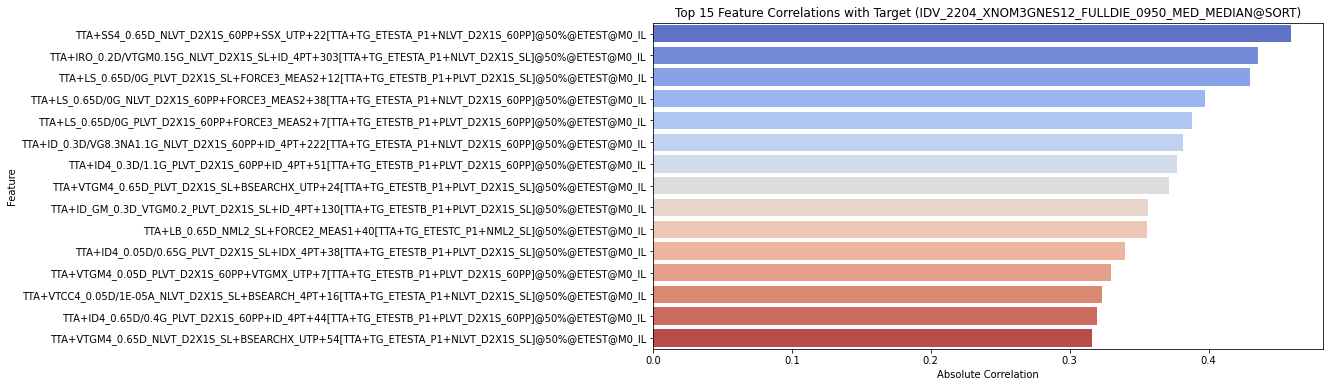

In [11]:
# Correlation of each feature with the target column only
target_col = 'IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT'
# Calculate absolute correlation of each feature with the target column
correlations = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)

# Bar plot of top 15 feature correlations with target
top_n = 15
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values[:top_n], y=correlations.index[:top_n], palette='coolwarm')
plt.title(f'Top {top_n} Feature Correlations with Target ({target_col})')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.show()

# Pairplot for top correlated features with the target column
# top_corr = correlations.index[:5].tolist()
# sns.pairplot(df, vars=top_corr + [target_col])
# plt.show()

## 5. Split Data into Training and Test Sets
Split the dataset into training and test sets using scikit-learn's train_test_split function.

In [12]:
# Split features and target
X = df.drop('IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT', axis=1)
y = df['IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEDIAN@SORT']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 20, Test samples: 6


## 6. Train a Machine Learning Model
Train a RandomForestRegressor on the training data.

## 6b. Train and Compare Multiple Machine Learning Models
Train and compare RandomForestRegressor, GradientBoostingRegressor, and LinearRegression on the training data.

Linear Regression: MAE=140.583, R2=0.309
Decision Tree: MAE=286.915, R2=-0.802
Random Forest: MAE=177.253, R2=0.274
Gradient Boosting: MAE=253.200, R2=-0.314


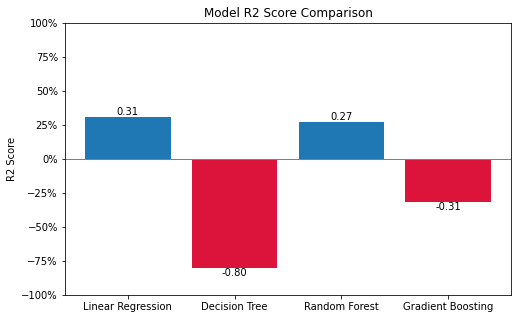

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),   
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name}: MAE={mae:.3f}, R2={r2:.3f}")

# Visualize comparison
import matplotlib.ticker as mtick
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), [v['R2'] for v in results.values()], color=['C0' if v['R2'] >= 0 else 'crimson' for v in results.values()])
plt.ylabel('R2 Score')
plt.title('Model R2 Score Comparison')
plt.ylim(min(-1, min(v['R2'] for v in results.values())), 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for rect, v in zip(bars, results.values()):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f"{v['R2']:.2f}", ha='center', va='bottom' if v['R2']>=0 else 'top', color='black')
plt.axhline(0, color='gray', linewidth=1)
plt.show()

## 6c. Hyperparameter Tuning with GridSearchCV for Random Forest
Use GridSearchCV to find the best hyperparameters for RandomForestRegressor and improve model performance.

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated R2: -0.7115186665593263
GridSearchCV Random Forest: MAE=180.342, R2=0.260
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated R2: -0.7115186665593263
GridSearchCV Random Forest: MAE=180.342, R2=0.260


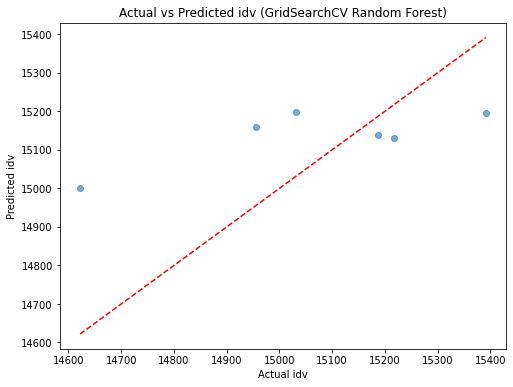

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best cross-validated R2:', grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'GridSearchCV Random Forest: MAE={mae:.3f}, R2={r2:.3f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual idv')
plt.ylabel('Predicted idv')
plt.title('Actual vs Predicted idv (GridSearchCV Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 6d. Hyperparameter Tuning with GridSearchCV for Decision Tree
Use GridSearchCV to find the best hyperparameters for DecisionTreeRegressor and improve model performance.

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters (Decision Tree): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated R2 (Decision Tree): -0.5133932494264261
GridSearchCV Decision Tree: MAE=96.356, R2=0.614
Best parameters (Decision Tree): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated R2 (Decision Tree): -0.5133932494264261
GridSearchCV Decision Tree: MAE=96.356, R2=0.614


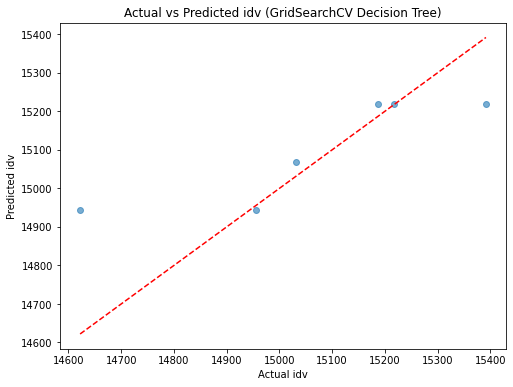

In [17]:
# Hyperparameter tuning for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

print('Best parameters (Decision Tree):', dt_grid_search.best_params_)
print('Best cross-validated R2 (Decision Tree):', dt_grid_search.best_score_)

# Evaluate on test set
dt_y_pred = dt_grid_search.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f'GridSearchCV Decision Tree: MAE={dt_mae:.3f}, R2={dt_r2:.3f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.6)
plt.xlabel('Actual idv')
plt.ylabel('Predicted idv')
plt.title('Actual vs Predicted idv (GridSearchCV Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## 6e. Hyperparameter Tuning with GridSearchCV for Gradient Boosting
Use GridSearchCV to find the best hyperparameters for GradientBoostingRegressor and improve model performance.

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated R2 (Gradient Boosting): -0.4622139600359452
GridSearchCV Gradient Boosting: MAE=177.322, R2=0.359
Best parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated R2 (Gradient Boosting): -0.4622139600359452
GridSearchCV Gradient Boosting: MAE=177.322, R2=0.359


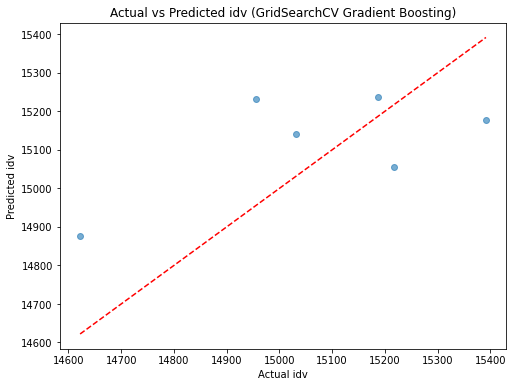

In [19]:
# Hyperparameter tuning for Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)

print('Best parameters (Gradient Boosting):', gb_grid_search.best_params_)
print('Best cross-validated R2 (Gradient Boosting):', gb_grid_search.best_score_)

# Evaluate on test set
gb_y_pred = gb_grid_search.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print(f'GridSearchCV Gradient Boosting: MAE={gb_mae:.3f}, R2={gb_r2:.3f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.6)
plt.xlabel('Actual idv')
plt.ylabel('Predicted idv')
plt.title('Actual vs Predicted idv (GridSearchCV Gradient Boosting)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Compare R2 Scores Before and After Hyperparameter Tuning (Gradient Boosting)
Visualize the improvement in model accuracy after tuning Gradient Boosting with GridSearchCV.

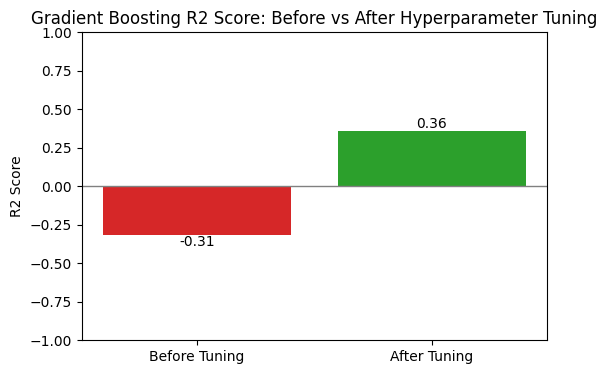

In [56]:
# Compare R2 scores before and after tuning for Gradient Boosting
r2_before_gb = results['Gradient Boosting']['R2'] if 'Gradient Boosting' in results else None
r2_after_gb = gb_r2  # from GridSearchCV cell

plt.figure(figsize=(6, 4))
plt.bar(['Before Tuning', 'After Tuning'], [r2_before_gb, r2_after_gb], color=['C3', 'C2'])
plt.ylabel('R2 Score')
plt.title('Gradient Boosting R2 Score: Before vs After Hyperparameter Tuning')
plt.ylim(min(-1, r2_before_gb, r2_after_gb), 1)
for i, v in enumerate([r2_before_gb, r2_after_gb]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v>=0 else 'top')
plt.axhline(0, color='gray', linewidth=1)
plt.show()

## 7. Evaluate Model Performance
Evaluate the model using R² and MAE, and visualize predictions vs actual values.

### Final R2 Scores of All Algorithms
Below are the final R2 scores for all algorithms after hyperparameter tuning (where applicable).

In [25]:
# Display final R2 scores for all algorithms
final_r2_scores = {
    'Linear Regression': results.get('Linear Regression', {}).get('R2', None),
    'Random Forest (Tuned)': r2 if 'r2' in locals() else None,
    'Decision Tree (Tuned)': dt_r2 if 'dt_r2' in locals() else None,
    'Gradient Boosting (Tuned)': gb_r2 if 'gb_r2' in locals() else None
}

for model, score in final_r2_scores.items():
    print(f"{model}: R2 = {score:.3f}" if score is not None else f"{model}: R2 = N/A")

Linear Regression: R2 = 0.309
Random Forest (Tuned): R2 = 0.260
Decision Tree (Tuned): R2 = 0.614
Gradient Boosting (Tuned): R2 = 0.359


### Compare All Models: R2 Scores Before and After Hyperparameter Tuning
This chart compares the R2 scores of all models before and after hyperparameter tuning.

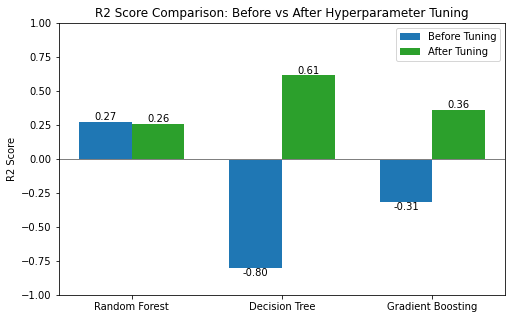

In [23]:
# Compare all models: R2 scores before and after hyperparameter tuning
model_names = ['Random Forest', 'Decision Tree', 'Gradient Boosting']
r2_before_all = [
    results.get('Random Forest', {}).get('R2', None),
    results.get('Decision Tree', {}).get('R2', None),
    results.get('Gradient Boosting', {}).get('R2', None)
]
r2_after_all = [
    r2 if 'r2' in locals() else None,  # Random Forest after tuning
    dt_r2 if 'dt_r2' in locals() else None,  # Decision Tree after tuning
    gb_r2 if 'gb_r2' in locals() else None   # Gradient Boosting after tuning
]

x = np.arange(len(model_names))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, r2_before_all, width, label='Before Tuning', color='C0')
plt.bar(x + width/2, r2_after_all, width, label='After Tuning', color='C2')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison: Before vs After Hyperparameter Tuning')
plt.xticks(x, model_names)
plt.ylim(min(-1, *(r2_before_all + r2_after_all)), 1)
for i, (b, a) in enumerate(zip(r2_before_all, r2_after_all)):
    if b is not None:
        plt.text(i - width/2, b, f'{b:.2f}', ha='center', va='bottom' if b>=0 else 'top')
    if a is not None:
        plt.text(i + width/2, a, f'{a:.2f}', ha='center', va='bottom' if a>=0 else 'top')
plt.axhline(0, color='gray', linewidth=1)
plt.legend()
plt.show()

## Feature Importance (Summary)
This section summarizes the most important features identified by the best-performing model after training. Feature importance helps you understand which variables most influence the model's predictions and can guide further analysis or feature selection.

Linear Regression does not provide feature importances.


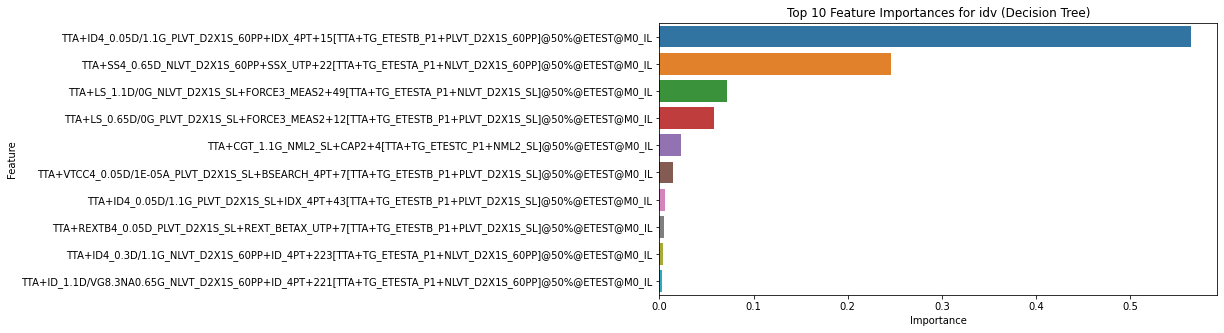

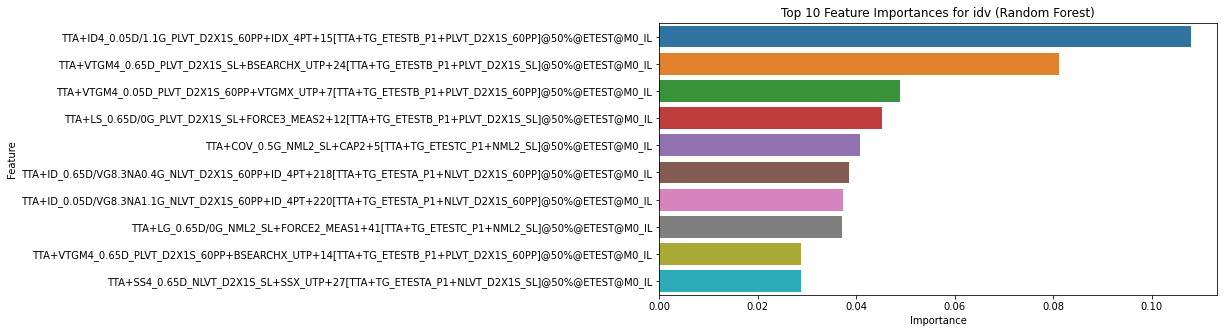

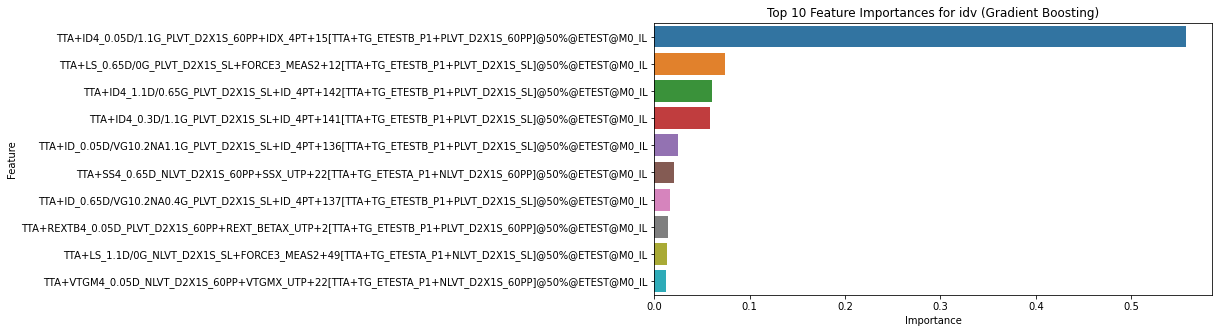

In [28]:
# Feature importance for different algorithms
importances_dict = {}
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        features = X.columns
        importances_dict[name] = (features[indices][:10], importances[indices][:10])
        plt.figure(figsize=(10, 5))
        sns.barplot(x=importances[indices][:10], y=features[indices][:10])
        plt.title(f'Top 10 Feature Importances for idv ({name})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"{name} does not provide feature importances.")

## 9. Predict on New Data
Demonstrate how to use the trained model to make predictions on new, unseen data.

In [27]:
# Example: Predict on new data (replace with your own new data)
# new_data should be a DataFrame with the same columns as X
# Example: new_data = pd.DataFrame([{...}])

# Uncomment and edit the following lines to use your own new data
# new_data = pd.DataFrame([{...}])
# new_data = pd.get_dummies(new_data)
# new_data = new_data.reindex(columns=X.columns, fill_value=0)
# prediction = rf.predict(new_data)
# print('Predicted idv:', prediction)

print('To predict on new data, create a DataFrame with the same columns as X and use rf.predict().')

To predict on new data, create a DataFrame with the same columns as X and use rf.predict().
